In [ ]:
# Load in the file
words = open("names.txt", "r").read().splitlines()

In [ ]:
# Print some example words
print(words[0:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [3]:
import torch
import torch.nn.functional as F

Bigram Language Model

In [4]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [ ]:
# Get the unique characters in the words, and create a mapping from character to index
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
# Get the bigram counts
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


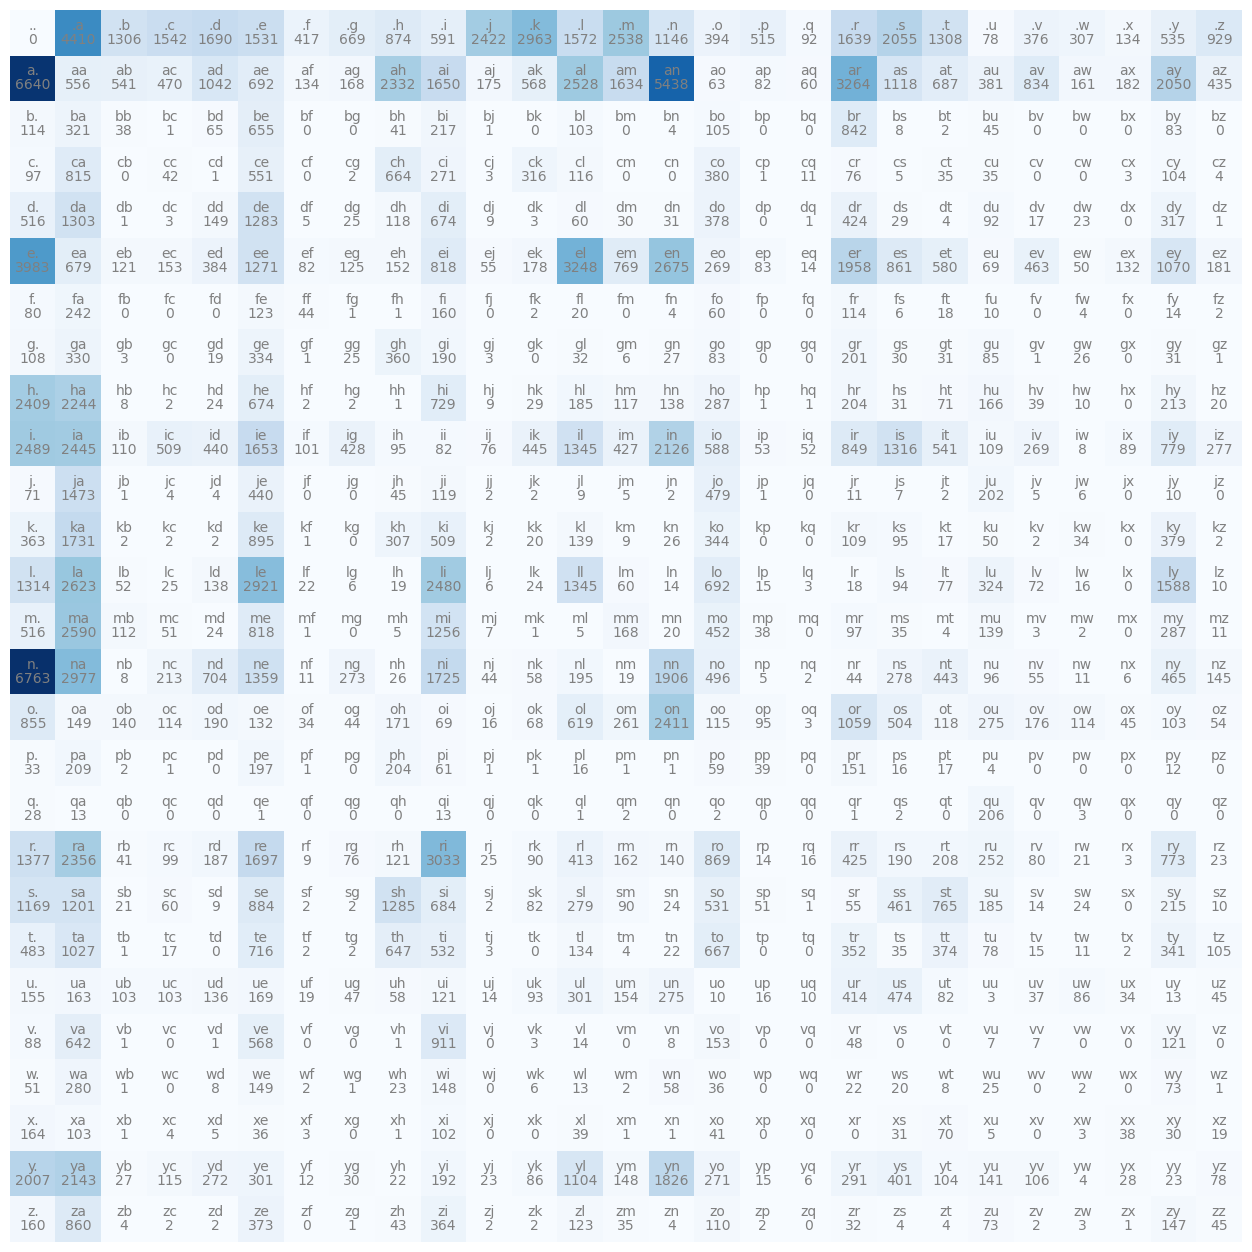

In [7]:
import matplotlib.pyplot as plt

itos = {i:s for s,i in stoi.items()}
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(N.shape[0]):
    for j in range(N.shape[1]):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')
plt.show()

In [ ]:
# Example of the bigram counts
p = N[0].float()
p = p / p.sum()
print(p)

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])


In [9]:
P = (N+1).float() / (N.sum(1, keepdim=True)+1) # adding 1 for smoothing

In [ ]:
# Sample names from the model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0 
    while True:
        p = P[ix]

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

# So bad

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


Building the nerual net to do the bigram appraoch

In [30]:
# Create the training set for bigrams to train

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"Number of elements: {num}")

# Randomly intialize 27 neurons
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

Number of elements: 228146


In [31]:
# Training loop
for i in range(200):
    # Forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)

    # Compute loss
    loss = -probs[torch.arange(len(ys)), ys].log().mean()

    # Backward pass
    W.grad = None
    loss.backward()
    
    # Update the tensor
    W.data += -50 * W.grad

    # Print loss
    print(loss.item())

3.758953809738159
3.371100902557373
3.154043197631836
3.020373821258545
2.927711248397827
2.8604023456573486
2.8097293376922607
2.7701025009155273
2.7380728721618652
2.711496591567993
2.6890032291412354
2.6696882247924805
2.6529300212860107
2.638277769088745
2.6253881454467773
2.613990545272827
2.60386323928833
2.5948219299316406
2.5867116451263428
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547365665435791
2.543415069580078
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301806926727295
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.517857789993286
2.515810489654541
2.513878345489502
2.512052059173584
2.510324001312256
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.504261016845703
2.5029289722442627
2.5016605854034424
2.5004522800445557
2.4992990493774414
2.498197317123413
2.4971446990966797
2.4961376190185547
2.495173692703247
2.4942493438720703
2.493363380432129
2

In [32]:
# Sample names from the model
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0 
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))



cexze.
momasurailezityha.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
